In [2]:
import pandas as pd
df = pd.read_excel("05_data1.xlsx", index_col = 0)

In [3]:
df

,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
no,,,,,,,,,,,,,,,,,
1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,31,2,11,155,55,68.0,132,82,97,198,60,80.0,106,10.6,0.9,1,1
7650,42,1,13,155,60,79.0,123,68,90,157,122,46.0,86,15.0,0.8,1,0
7651,41,1,9,165,60,85.0,118,81,81,100,55,46.0,43,15.1,0.8,1,0


In [4]:
#1->men

In [5]:
data6=df.loc[:,['gender','height','weight','waist','drinking','smoking']]

data6.loc[data6['gender']==1, ['gender']]='M'
data6.loc[data6['gender']==2, ['gender']]='F'
data6.loc[data6['drinking']==0, ['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1, ['drinking']]='drinking'
data6.loc[data6['smoking']==1, ['smoking']]='Non-smoking'
data6.loc[data6['smoking']==2, ['smoking']]='semi'
data6.loc[data6['smoking']==3, ['smoking']]='smoking'

In [6]:
data6


,gender,height,weight,waist,drinking,smoking
no,,,,,,
1,M,165,60,72.1,Non-drinking,Non-smoking
5,F,155,50,75.2,Non-drinking,Non-smoking
6,M,185,85,94.0,drinking,smoking
7,M,165,80,93.0,drinking,smoking
9,F,150,50,82.0,Non-drinking,Non-smoking
...,...,...,...,...,...,...
7648,F,155,55,68.0,drinking,Non-smoking
7650,M,155,60,79.0,Non-drinking,Non-smoking
7651,M,165,60,85.0,Non-drinking,Non-smoking


In [7]:
drinking=data6.groupby(['gender','drinking'])['drinking'].count()
smoking=data6.groupby(['gender','smoking'])['smoking'].count()
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')
drinking = drinking.reset_index()
smoking = smoking.reset_index()

In [8]:
drinking

,gender,drinking,count
0,F,Non-drinking,888
1,F,drinking,611
2,M,Non-drinking,415
3,M,drinking,1086


In [9]:
smoking

,gender,smoking,count
0,F,Non-smoking,1422
1,F,semi,45
2,F,smoking,32
3,M,Non-smoking,502
4,M,semi,519
5,M,smoking,480


In [10]:
data=df.loc[:,['gender','height','weight','age_code','blood_sugar']]

data.loc[data['gender']==1, ['gender']]='M'
data.loc[data['gender']==2, ['gender']]='F'


In [11]:
data

,gender,height,weight,age_code,blood_sugar
no,,,,,
1,M,165,60,9,90
5,F,155,50,12,110
6,M,185,85,9,86
7,M,165,80,9,250
9,F,150,50,17,104
...,...,...,...,...,...
7648,F,155,55,11,97
7650,M,155,60,13,90
7651,M,165,60,9,81


In [12]:
group1=data.loc[data['blood_sugar']>=120,['gender']]
group1

data.loc[data['blood_sugar']>=120, ['blood_sugar']]='120over'
data.loc[data['blood_sugar']!='120over', ['blood_sugar']]='120under'

In [13]:
sugar=data.groupby(['gender','blood_sugar'])['gender'].count()
sugar = sugar.to_frame(name='count')
sugar = sugar.reset_index()

In [14]:
sugar

,gender,blood_sugar,count
0,F,120over,145
1,F,120under,1354
2,M,120over,276
3,M,120under,1225


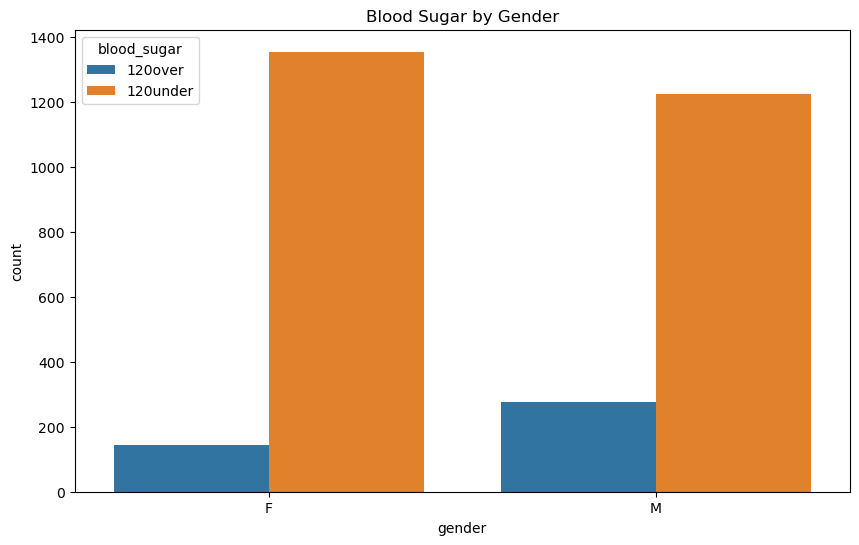

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=sugar, x='gender', y='count', hue='blood_sugar')

plt.title('Blood Sugar by Gender')
plt.show()

In [16]:
data2=df.loc[:,['gender','height','weight']]
data2= data2.reindex(columns=data2.columns.tolist() + ["bmi"])
data2.loc[data2['weight']/((data2['height']/100)*(data2['height']/100))>=25, ['bmi']]='1'
data2.loc[((data2['weight']/((data2['height']/100)*(data2['height']/100))<=25) & (data2['weight']/((data2['height']/100)*(data2['height']/100))>=23)), ['bmi']]='2'
data2.loc[(data2['bmi']!='1') & (data2['bmi']!='2'), ['bmi']]='3'

In [17]:
data2

,gender,height,weight,bmi
no,,,,
1,1,165,60,3
5,2,155,50,3
6,1,185,85,2
7,1,165,80,1
9,2,150,50,3
...,...,...,...,...
7648,2,155,55,3
7650,1,155,60,2
7651,1,165,60,3


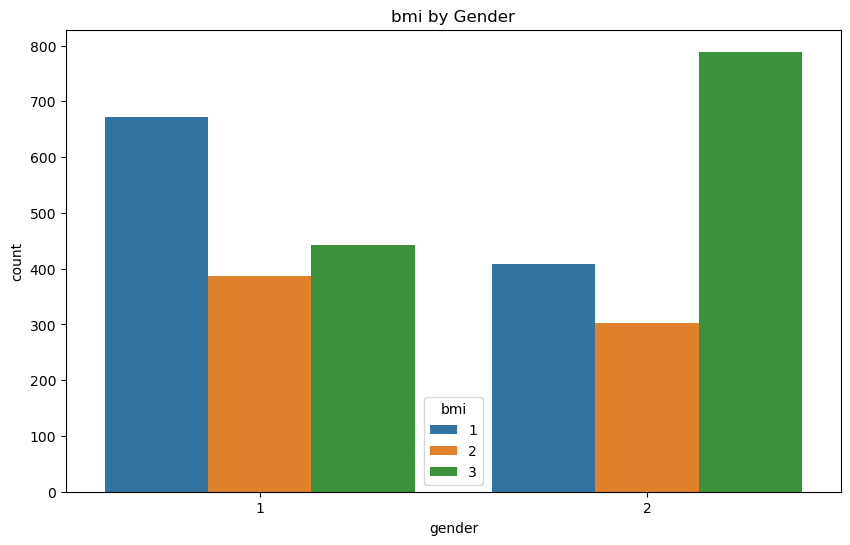

In [18]:
bmi=data2.groupby(['gender','bmi'])['bmi'].count()
bmi = bmi.to_frame(name='count')
bmi = bmi.reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=bmi, x='gender', y='count', hue='bmi')

plt.title('bmi by Gender')
plt.show()

In [19]:
bmi

,gender,bmi,count
0,1,1,672
1,1,2,386
2,1,3,443
3,2,1,408
4,2,2,302
5,2,3,789


In [25]:
df

,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
no,,,,,,,,,,,,,,,,,
1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,31,2,11,155,55,68.0,132,82,97,198,60,80.0,106,10.6,0.9,1,1
7650,42,1,13,155,60,79.0,123,68,90,157,122,46.0,86,15.0,0.8,1,0
7651,41,1,9,165,60,85.0,118,81,81,100,55,46.0,43,15.1,0.8,1,0


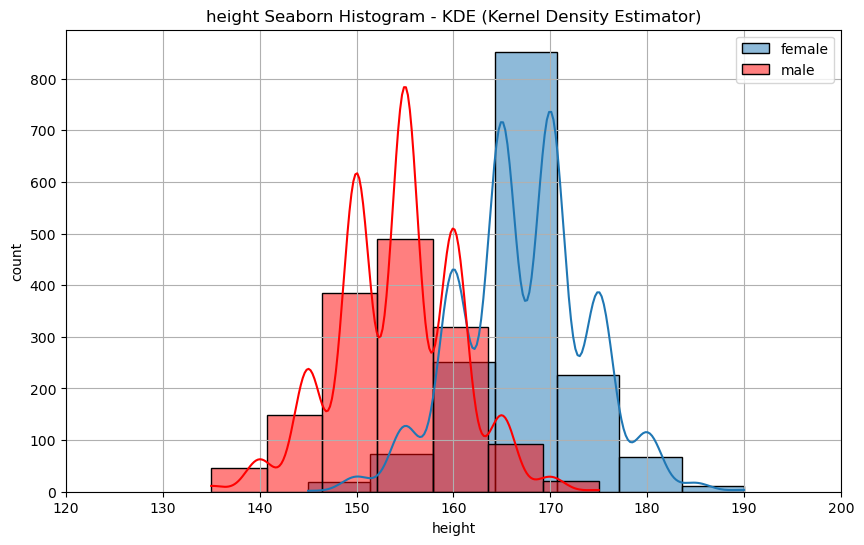

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data setup (For demonstration purposes)
# df = pd.DataFrame({'waist': [...], 'gender': [...]}), assuming you already have df.

# Splitting the data based on gender
maledata = df[df['gender'] == 1]
femaledata = df[df['gender'] == 2]

plt.figure(figsize=(10,6))
sns.histplot(maledata['height'], bins=7, alpha=0.5, label='female', kde=True)
sns.histplot(femaledata['height'], bins=7, alpha=0.5, label='male', color='r', kde=True)
plt.xlim(120,200)
plt.xlabel('height')
plt.ylabel('count')
plt.title('height Seaborn Histogram - KDE (Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()


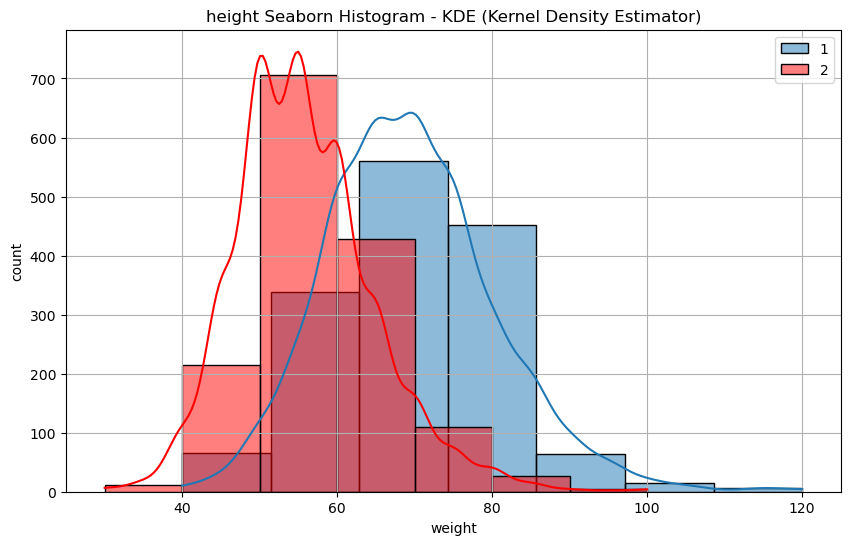

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data setup (For demonstration purposes)
# df = pd.DataFrame({'waist': [...], 'gender': [...]}), assuming you already have df.

# Splitting the data based on gender
maledata = df[df['gender'] == 1]
femaledata = df[df['gender'] == 2]

plt.figure(figsize=(10,6))
sns.histplot(maledata['weight'], bins=7, alpha=0.5, label='1', kde=True)
sns.histplot(femaledata['weight'], bins=7, alpha=0.5, label='2', color='r', kde=True)
plt.xlim(25,125)
plt.xlabel('weight')
plt.ylabel('count')
plt.title('height Seaborn Histogram - KDE (Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()


In [35]:
#KDE 공부해두기

In [70]:
df2 = pd.read_csv("abalone_2.csv", index_col = 0)
df2 = df2.reset_index()

In [71]:
df2

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.4070,2.0
1,0.275,0.095,0.2170,0.0435,0.0900,1.0
2,0.470,0.165,0.9975,0.2420,0.3300,0.0
3,0.450,0.140,1.0130,0.2160,0.3600,0.0
4,0.380,0.135,0.6810,0.1420,0.1700,0.0
...,...,...,...,...,...,...
997,0.450,0.160,0.9980,0.2140,0.3010,0.0
998,0.260,0.100,0.1920,0.0585,0.0700,1.0
999,0.505,0.175,1.2075,0.2620,0.3900,0.0
1000,0.300,0.105,0.3040,0.0610,0.0805,1.0


In [86]:
df2.loc[df2['Group']==0.0, ['Group']]='Year0'
df2.loc[df2['Group']==1.0, ['Group']]='Year1'
df2.loc[df2['Group']==2.0, ['Group']]='Year2'
df2

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.4070,Year2
1,0.275,0.095,0.2170,0.0435,0.0900,Year1
2,0.470,0.165,0.9975,0.2420,0.3300,Year0
3,0.450,0.140,1.0130,0.2160,0.3600,Year0
4,0.380,0.135,0.6810,0.1420,0.1700,Year0
...,...,...,...,...,...,...
997,0.450,0.160,0.9980,0.2140,0.3010,Year0
998,0.260,0.100,0.1920,0.0585,0.0700,Year1
999,0.505,0.175,1.2075,0.2620,0.3900,Year0
1000,0.300,0.105,0.3040,0.0610,0.0805,Year1


In [87]:
c=df2.groupby(['Group'])['Group'].count()
c = c.to_frame(name='count')
c = c.reset_index()
c

,Group,count
0,Year0,416
1,Year1,426
2,Year2,160


(0.0, 500.0)

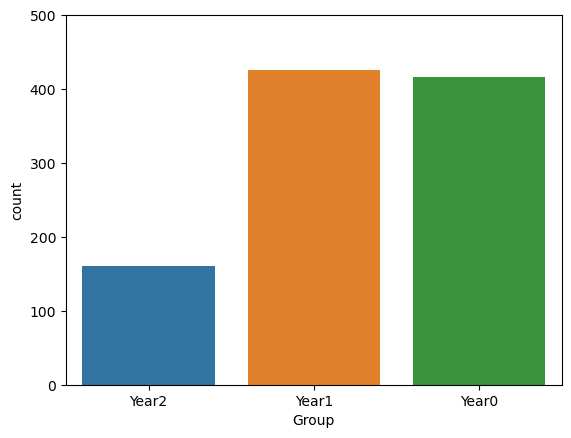

In [92]:
sns.countplot(data=df2,x="Group")
plt.ylim(0, 500)

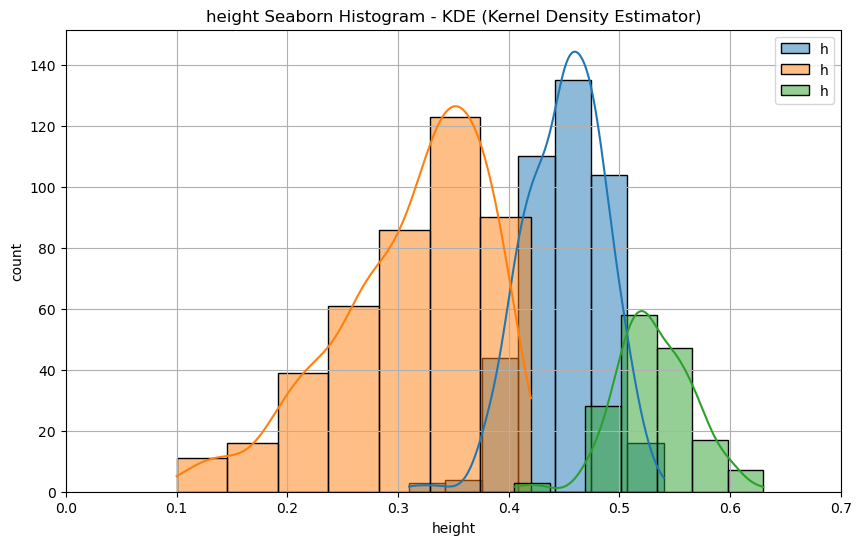

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

y0 = df2[df2['Group'] == 'Year0']
y1 = df2[df2['Group'] == 'Year1']
y2 = df2[df2['Group'] == 'Year2']

plt.figure(figsize=(10,6))
sns.histplot(y0['Diameter'], bins=7, alpha=0.5, label='h', kde=True)
sns.histplot(y1['Diameter'], bins=7, alpha=0.5, label='h', kde=True)
sns.histplot(y2['Diameter'], bins=7, alpha=0.5, label='h', kde=True)
plt.xlim(0,0.7)
plt.xlabel('height')
plt.ylabel('count')
plt.title('height Seaborn Histogram - KDE (Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()


In [101]:
df2

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.4070,Year2
1,0.275,0.095,0.2170,0.0435,0.0900,Year1
2,0.470,0.165,0.9975,0.2420,0.3300,Year0
3,0.450,0.140,1.0130,0.2160,0.3600,Year0
4,0.380,0.135,0.6810,0.1420,0.1700,Year0
...,...,...,...,...,...,...
997,0.450,0.160,0.9980,0.2140,0.3010,Year0
998,0.260,0.100,0.1920,0.0585,0.0700,Year1
999,0.505,0.175,1.2075,0.2620,0.3900,Year0
1000,0.300,0.105,0.3040,0.0610,0.0805,Year1


<Axes: xlabel='group', ylabel='diameter'>

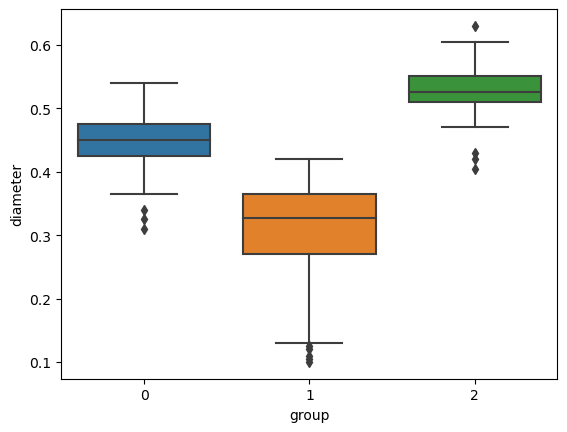

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.xlabel('group')
plt.ylabel('diameter')
sns.boxplot([y0['Diameter'],y1['Diameter'],y2['Diameter']])


<Axes: xlabel='group', ylabel='height'>

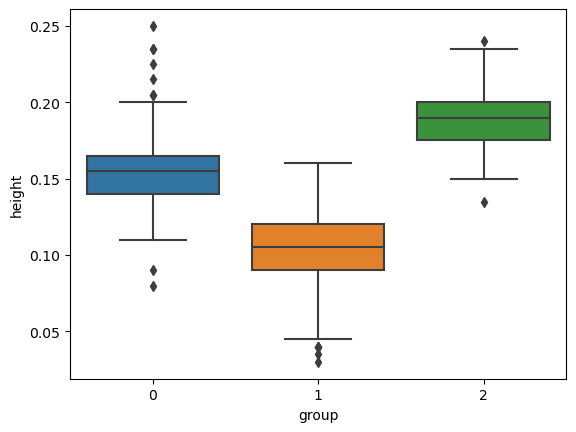

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel('group')
plt.ylabel('height')
sns.boxplot([y0['Height'],y1['Height'],y2['Height']])


In [108]:
#x y 축 라벨 나중에 붙이기

<Axes: xlabel='Group', ylabel='Diameter'>

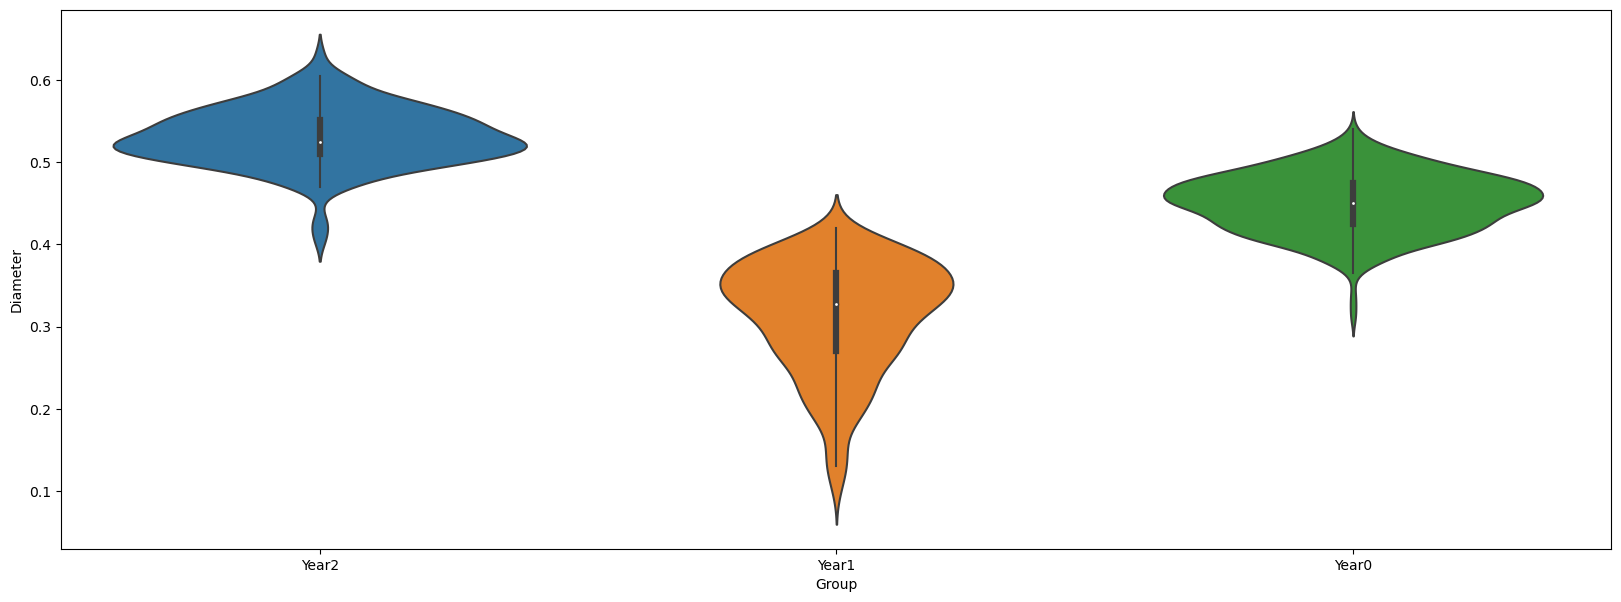

In [111]:
plt.figure(figsize = (20,7))
sns.violinplot(x = 'Group', y = 'Diameter', data =df2)

<Axes: xlabel='Group', ylabel='Height'>

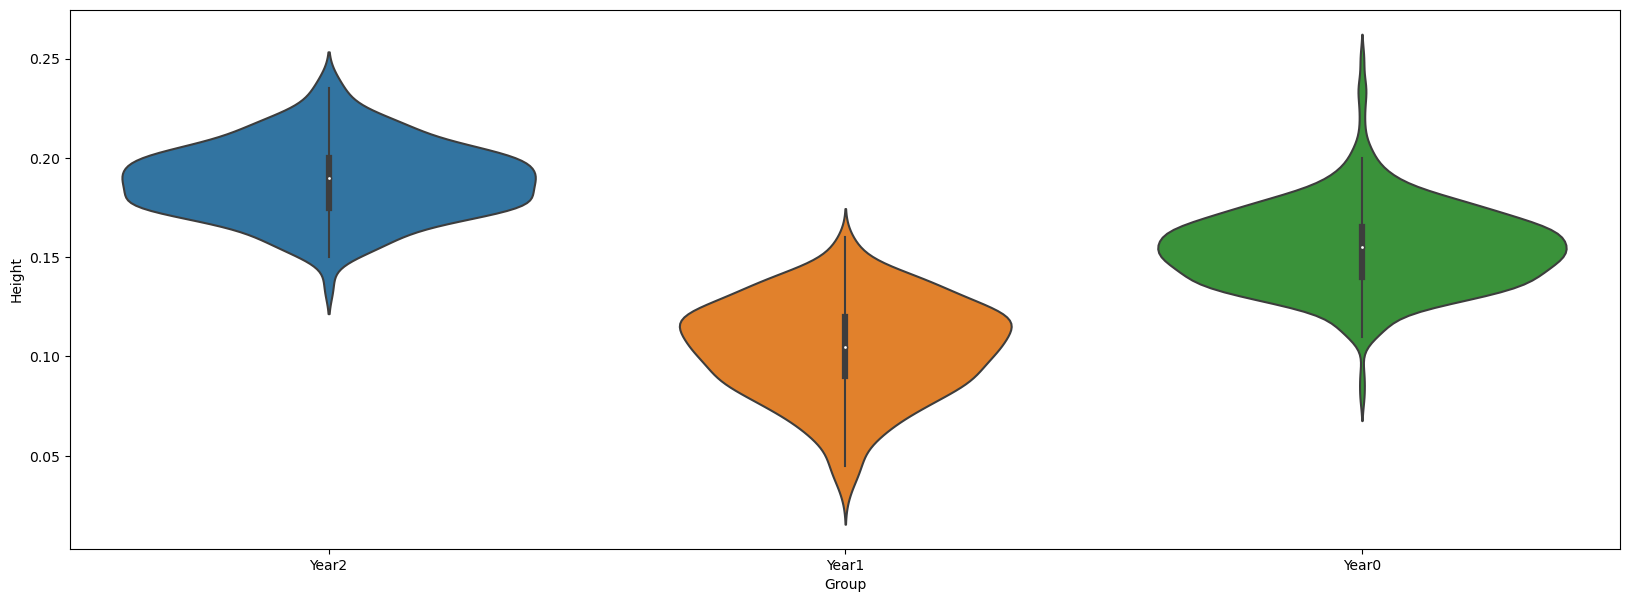

In [112]:
plt.figure(figsize = (20,7))
sns.violinplot(x = 'Group', y = 'Height', data =df2)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_27536/3356101416.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crr = df2.corr()


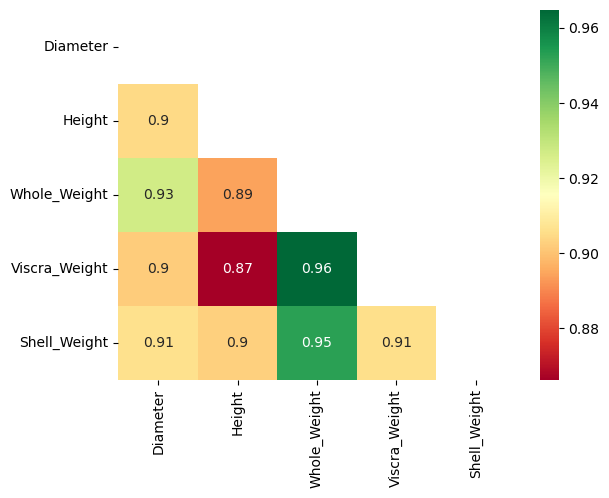

In [117]:
crr = df2.corr()
upp_mat = np.triu(crr)
sns.heatmap(crr, annot=True, cmap='RdYlGn', mask=upp_mat)
plt.show()

In [ ]:
sns.heatmap(df2.corr(), annot=True)

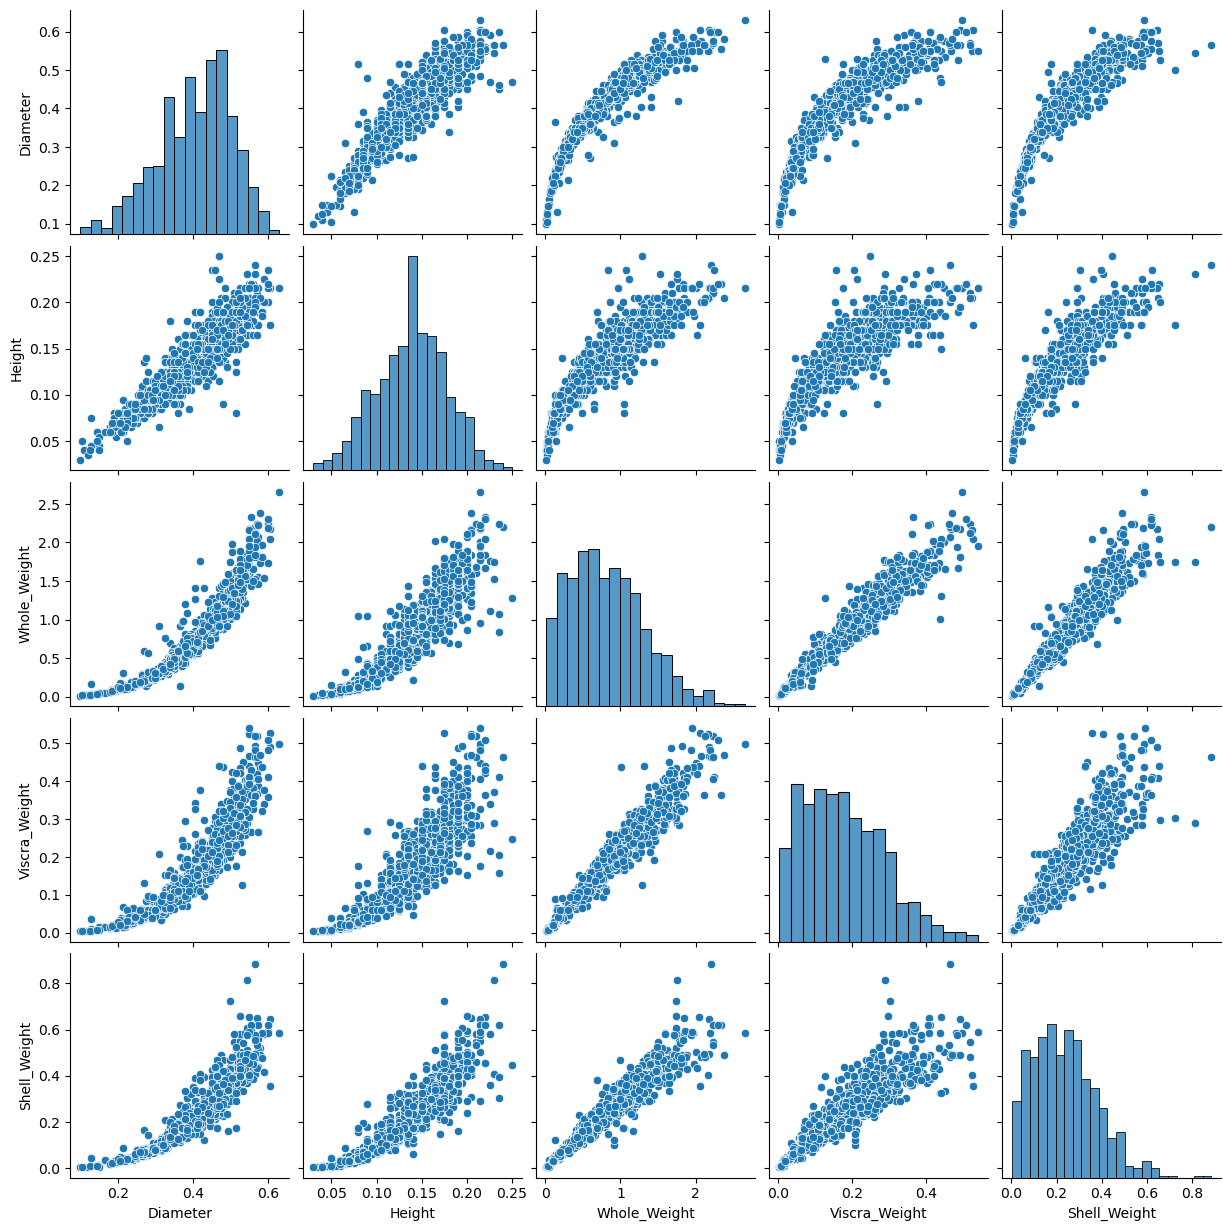

In [109]:
import numpy as np
num_features = df2.select_dtypes(include=[np.number]).columns
sns.pairplot(df2[num_features])

In [145]:
data=df2.loc[:,['Diameter','Height','Group']]

In [146]:
data

,Diameter,Height,Group
0,0.525,0.195,Year2
1,0.275,0.095,Year1
2,0.470,0.165,Year0
3,0.450,0.140,Year0
4,0.380,0.135,Year0
...,...,...,...
997,0.450,0.160,Year0
998,0.260,0.100,Year1
999,0.505,0.175,Year0
1000,0.300,0.105,Year1


In [147]:

data.loc[data['Diameter']>=0.4, ['Diameter']]='BIG'
data.loc[data['Diameter']!='BIG', ['Diameter']]='SMALL'



In [148]:
cc=data.groupby(['Group','Diameter'])['Diameter'].count()
cc = cc.to_frame(name='count')
cc = cc.reset_index()


In [149]:
cc

,Group,Diameter,count
0,Year0,BIG,392
1,Year0,SMALL,24
2,Year1,BIG,26
3,Year1,SMALL,400
4,Year2,BIG,160


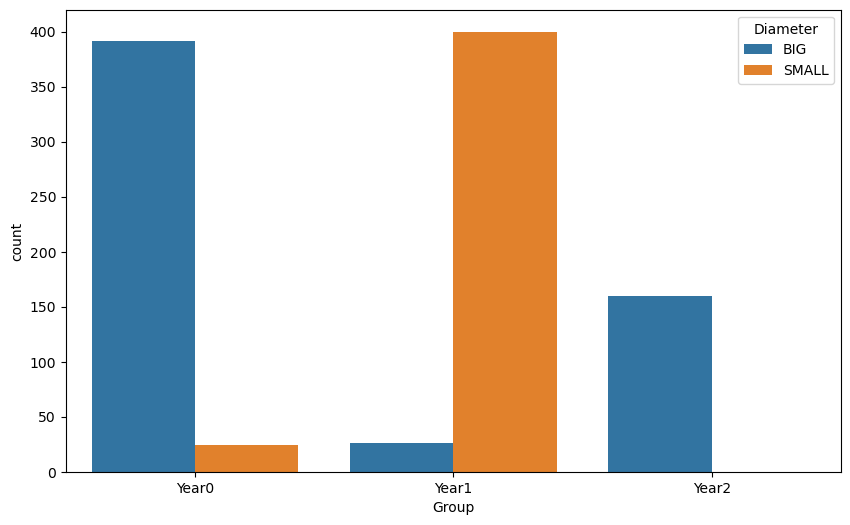

In [151]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=cc, x='Group', y='count',hue='Diameter')

plt.show()